<a href="https://colab.research.google.com/github/KSaiNihal/Classification_project.unp/blob/main/Hepatitis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Data Preprocessing

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import copy
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [ ]:
URL="/content/drive/MyDrive/PROJECTS/CLASSIFICATION/hepatitis/hepatitis_csv.csv"
df=pd.read_csv(URL)

In [ ]:
df

,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology,class
0,30,male,False,False,False,False,False,False,False,False,False,False,False,1.0,85.0,18.0,4.0,NaN,False,live
1,50,female,False,False,True,False,False,False,False,False,False,False,False,0.9,135.0,42.0,3.5,NaN,False,live
2,78,female,True,False,True,False,False,True,False,False,False,False,False,0.7,96.0,32.0,4.0,NaN,False,live
3,31,female,NaN,True,False,False,False,True,False,False,False,False,False,0.7,46.0,52.0,4.0,80.0,False,live
4,34,female,True,False,False,False,False,True,False,False,False,False,False,1.0,NaN,200.0,4.0,NaN,False,live
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,46,female,True,False,True,True,True,True,False,False,True,True,True,7.6,NaN,242.0,3.3,50.0,True,die
151,44,female,True,False,True,False,False,True,True,False,False,False,False,0.9,126.0,142.0,4.3,NaN,True,live
152,61,female,False,False,True,True,False,False,True,False,True,False,False,0.8,75.0,20.0,4.1,NaN,True,live
153,53,male,False,False,True,False,False,True,False,True,True,False,True,1.5,81.0,19.0,4.1,48.0,True,live


In [ ]:
df.columns

Index(['age', 'sex', 'steroid', 'antivirals', 'fatigue', 'malaise', 'anorexia',
       'liver_big', 'liver_firm', 'spleen_palpable', 'spiders', 'ascites',
       'varices', 'bilirubin', 'alk_phosphate', 'sgot', 'albumin', 'protime',
       'histology', 'class'],
      dtype='object')

In [ ]:
df.shape

(155, 20)

In [ ]:
data = copy.deepcopy(df)

In [ ]:
data.isna().sum()

age                 0
sex                 0
steroid             1
antivirals          0
fatigue             1
malaise             1
anorexia            1
liver_big          10
liver_firm         11
spleen_palpable     5
spiders             5
ascites             5
varices             5
bilirubin           6
alk_phosphate      29
sgot                4
albumin            16
protime            67
histology           0
class               0
dtype: int64

In [ ]:
data['steroid']=data['steroid'].fillna(data['steroid'].max())
data['fatigue']=data['fatigue'].fillna(data['fatigue'].max())
data['malaise']=data['malaise'].fillna(data['malaise'].max())
data['anorexia']=data['anorexia'].fillna(data['anorexia'].max())
data['liver_big']=data['liver_big'].fillna(data['liver_big'].max())
data['liver_firm']=data['liver_firm'].fillna(data['liver_firm'].max())
data['spleen_palpable']=data['spleen_palpable'].fillna(data['spleen_palpable'].max())
data['spiders']=data['spiders'].fillna(data['spiders'].max())
data['ascites']=data['ascites'].fillna(data['ascites'].max())
data['varices']=data['varices'].fillna(data['varices'].max())
data['bilirubin']=data['bilirubin'].fillna(data['bilirubin'].max())
data['alk_phosphate']=data['alk_phosphate'].fillna(data['alk_phosphate'].median())
data['sgot']=data['sgot'].fillna(data['sgot'].median())
data['albumin']=data['albumin'].fillna(data['albumin'].mean())
data['protime']=data['protime'].fillna(data['protime'].median())

In [ ]:
data.isna().sum()

age                0
sex                0
steroid            0
antivirals         0
fatigue            0
malaise            0
anorexia           0
liver_big          0
liver_firm         0
spleen_palpable    0
spiders            0
ascites            0
varices            0
bilirubin          0
alk_phosphate      0
sgot               0
albumin            0
protime            0
histology          0
class              0
dtype: int64

In [ ]:
data['steroid']=data.steroid.astype('int')
data['antivirals']=data.antivirals.astype('int')
data['fatigue']=data.fatigue.astype('int')
data['malaise']=data.malaise.astype('int')
data['anorexia']=data.anorexia.astype('int')
data['liver_big']=data.liver_big.astype('int')
data['liver_firm']=data.liver_firm.astype('int')
data['spleen_palpable']=data.spleen_palpable.astype('int')
data['spiders']=data.spiders.astype('int')
data['ascites']=data.ascites.astype('int')
data['varices']=data.varices.astype('int')
data['histology']=data.histology.astype('int')

In [ ]:
data

,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology,class
0,30,male,0,0,0,0,0,0,0,0,0,0,0,1.0,85.0,18.0,4.0,61.0,0,live
1,50,female,0,0,1,0,0,0,0,0,0,0,0,0.9,135.0,42.0,3.5,61.0,0,live
2,78,female,1,0,1,0,0,1,0,0,0,0,0,0.7,96.0,32.0,4.0,61.0,0,live
3,31,female,1,1,0,0,0,1,0,0,0,0,0,0.7,46.0,52.0,4.0,80.0,0,live
4,34,female,1,0,0,0,0,1,0,0,0,0,0,1.0,85.0,200.0,4.0,61.0,0,live
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,46,female,1,0,1,1,1,1,0,0,1,1,1,7.6,85.0,242.0,3.3,50.0,1,die
151,44,female,1,0,1,0,0,1,1,0,0,0,0,0.9,126.0,142.0,4.3,61.0,1,live
152,61,female,0,0,1,1,0,0,1,0,1,0,0,0.8,75.0,20.0,4.1,61.0,1,live
153,53,male,0,0,1,0,0,1,0,1,1,0,1,1.5,81.0,19.0,4.1,48.0,1,live


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              155 non-null    int64  
 1   sex              155 non-null    object 
 2   steroid          155 non-null    int64  
 3   antivirals       155 non-null    int64  
 4   fatigue          155 non-null    int64  
 5   malaise          155 non-null    int64  
 6   anorexia         155 non-null    int64  
 7   liver_big        155 non-null    int64  
 8   liver_firm       155 non-null    int64  
 9   spleen_palpable  155 non-null    int64  
 10  spiders          155 non-null    int64  
 11  ascites          155 non-null    int64  
 12  varices          155 non-null    int64  
 13  bilirubin        155 non-null    float64
 14  alk_phosphate    155 non-null    float64
 15  sgot             155 non-null    float64
 16  albumin          155 non-null    float64
 17  protime         

In [ ]:
data["sex"]=data.sex.replace(("male","female"), (1,0))
data["steroid"]=data.steroid.replace(("True","False"), (1,0))
data["antivirals"]=data.antivirals.replace(("True","False"), (1,0))
data["fatigue"]=data.fatigue.replace(("True","False"), (1,0))
data['malaise']=data.malaise.replace(("True","False"), (1,0))
data['anorexia']=data.anorexia.replace(("True","False"), (1,0))
data['liver_big']=data.liver_big.replace(("True","False"), (1,0))
data['liver_firm']=data.liver_firm.replace(("True","False"), (1,0))
data['spleen_palpable']=data.spleen_palpable.replace(("True","False"), (1,0))
data['spiders']=data.spiders.replace(("True","False"), (1,0))
data['ascites']=data.ascites.replace(("True","False"), (1,0))
data['varices']=data.varices.replace(("True","False"), (1,0))
data['histology']=data.histology.replace(("True","False"), (1,0))
data['class']=data['class'].replace(("live","die"), (1,0))

In [ ]:
data

,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology,class
0,30,1,0,0,0,0,0,0,0,0,0,0,0,1.0,85.0,18.0,4.0,61.0,0,1
1,50,0,0,0,1,0,0,0,0,0,0,0,0,0.9,135.0,42.0,3.5,61.0,0,1
2,78,0,1,0,1,0,0,1,0,0,0,0,0,0.7,96.0,32.0,4.0,61.0,0,1
3,31,0,1,1,0,0,0,1,0,0,0,0,0,0.7,46.0,52.0,4.0,80.0,0,1
4,34,0,1,0,0,0,0,1,0,0,0,0,0,1.0,85.0,200.0,4.0,61.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,46,0,1,0,1,1,1,1,0,0,1,1,1,7.6,85.0,242.0,3.3,50.0,1,0
151,44,0,1,0,1,0,0,1,1,0,0,0,0,0.9,126.0,142.0,4.3,61.0,1,1
152,61,0,0,0,1,1,0,0,1,0,1,0,0,0.8,75.0,20.0,4.1,61.0,1,1
153,53,1,0,0,1,0,0,1,0,1,1,0,1,1.5,81.0,19.0,4.1,48.0,1,1


In [ ]:
duplicated =data[data.duplicated()]
print('Before dropping duplicates:', data.shape[0])
print('Number of duplicate rows:', len(duplicated))

Before dropping duplicates: 155
Number of duplicate rows: 0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              155 non-null    int64  
 1   sex              155 non-null    int64  
 2   steroid          155 non-null    int64  
 3   antivirals       155 non-null    int64  
 4   fatigue          155 non-null    int64  
 5   malaise          155 non-null    int64  
 6   anorexia         155 non-null    int64  
 7   liver_big        155 non-null    int64  
 8   liver_firm       155 non-null    int64  
 9   spleen_palpable  155 non-null    int64  
 10  spiders          155 non-null    int64  
 11  ascites          155 non-null    int64  
 12  varices          155 non-null    int64  
 13  bilirubin        155 non-null    float64
 14  alk_phosphate    155 non-null    float64
 15  sgot             155 non-null    float64
 16  albumin          155 non-null    float64
 17  protime         

In [ ]:
data.describe()

,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology,class
count,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000
mean,41.200000,0.103226,0.509677,0.154839,0.651613,0.400000,0.212903,0.838710,0.458065,0.225806,0.361290,0.161290,0.148387,1.681935,101.522581,85.174194,3.817266,61.483871,0.451613,0.793548
std,12.565878,0.305240,0.501527,0.362923,0.478004,0.491486,0.410687,0.368991,0.499853,0.419468,0.481932,0.368991,0.356636,1.740670,47.082042,88.590122,0.616750,17.198745,0.499266,0.406070
min,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.300000,26.000000,14.000000,2.100000,0.000000,0.000000,0.000000
25%,32.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.800000,78.000000,32.500000,3.500000,57.000000,0.000000,1.000000
50%,39.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,85.000000,58.000000,3.900000,61.000000,0.000000,1.000000
75%,50.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.600000,119.500000,99.000000,4.200000,65.000000,1.000000,1.000000
max,78.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,295.000000,648.000000,6.400000,100.000000,1.000000,1.000000


#Data EDA

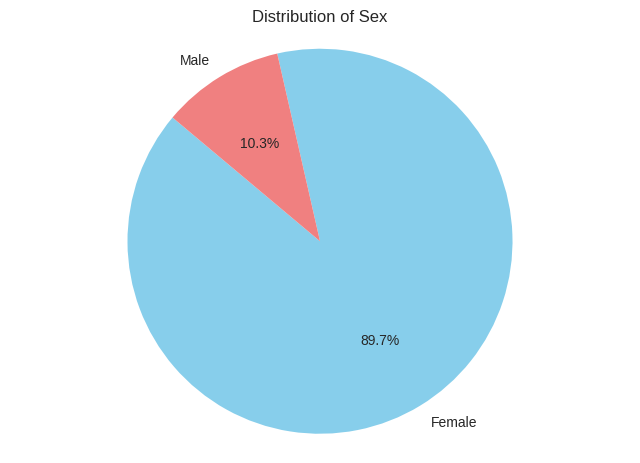

In [ ]:
sex_counts = data['sex'].value_counts()
sex_labels = {0: 'Female', 1: 'Male'}
sex_counts.index = sex_counts.index.map(sex_labels)
colors = ['skyblue', 'lightcoral']
plt.pie(sex_counts, labels=sex_counts.index, colors=colors, autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.title('Distribution of Sex')
plt.show()

<ipython-input-167-d15960e55873>:7: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


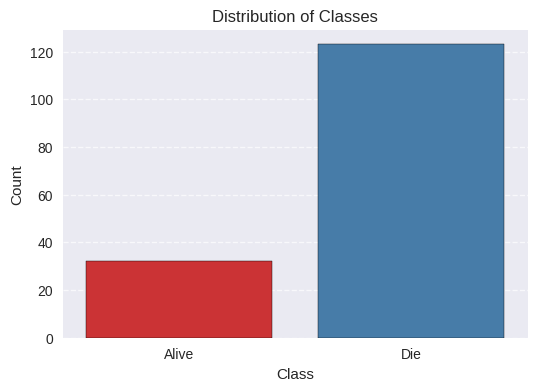

In [ ]:
plt.figure(figsize=(6, 4))
sns.countplot(data=data, x='class', palette='Set1',edgecolor="black")
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Distribution of Classes')
plt.gca().set_xticklabels(['Alive', 'Die'])
plt.style.use('seaborn')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

<ipython-input-168-17dd49094841>:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


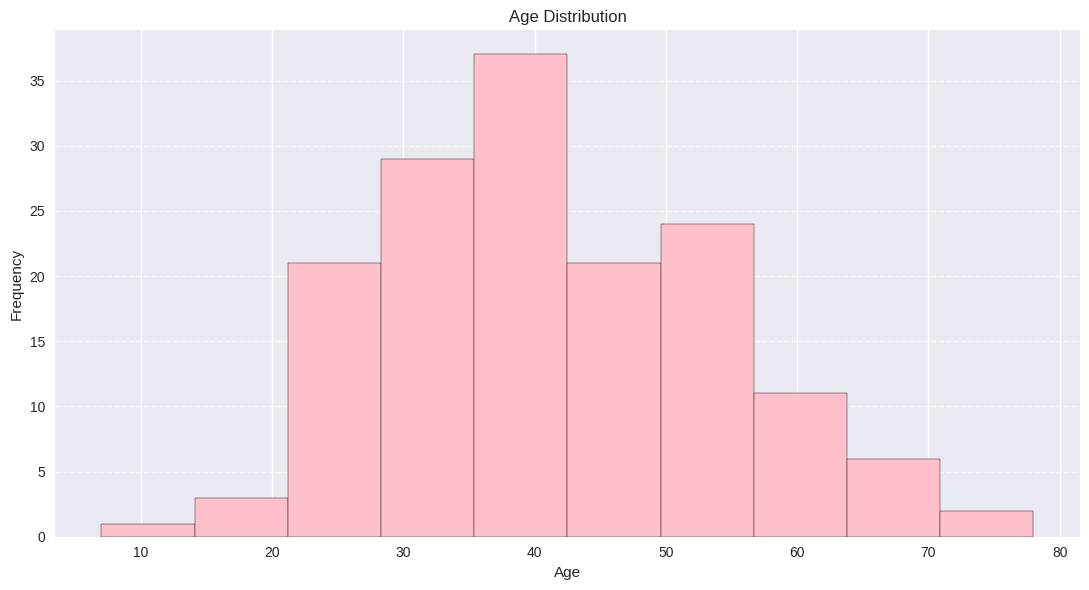

In [ ]:
fig = plt.figure(figsize=(11,6))
plt.hist(df['age'], bins=10, edgecolor='black',color="pink")
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution')
plt.style.use('seaborn')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

<ipython-input-169-f4679bfa4f97>:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(data=data, y=attribute, x='class', ci=None,edgecolor="black")
<ipython-input-169-f4679bfa4f97>:12: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


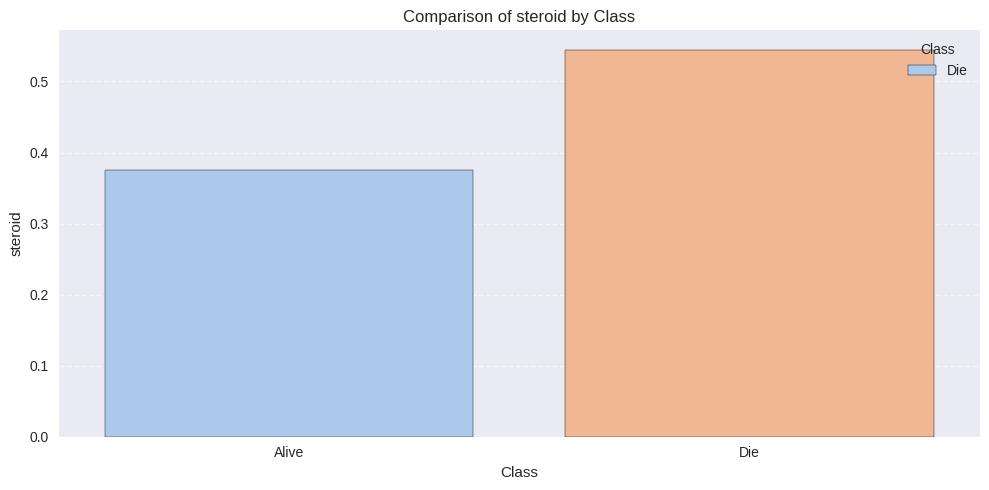

<ipython-input-169-f4679bfa4f97>:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(data=data, y=attribute, x='class', ci=None,edgecolor="black")
<ipython-input-169-f4679bfa4f97>:12: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


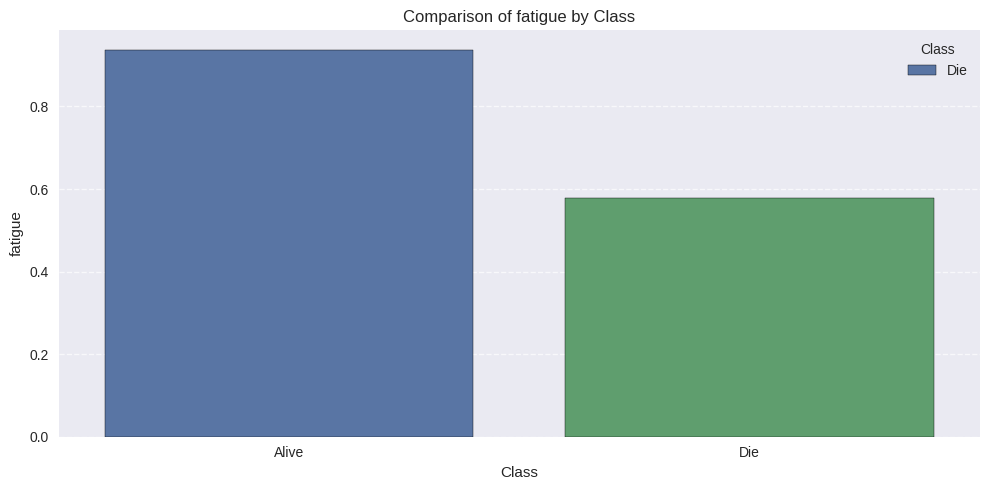

<ipython-input-169-f4679bfa4f97>:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(data=data, y=attribute, x='class', ci=None,edgecolor="black")
<ipython-input-169-f4679bfa4f97>:12: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


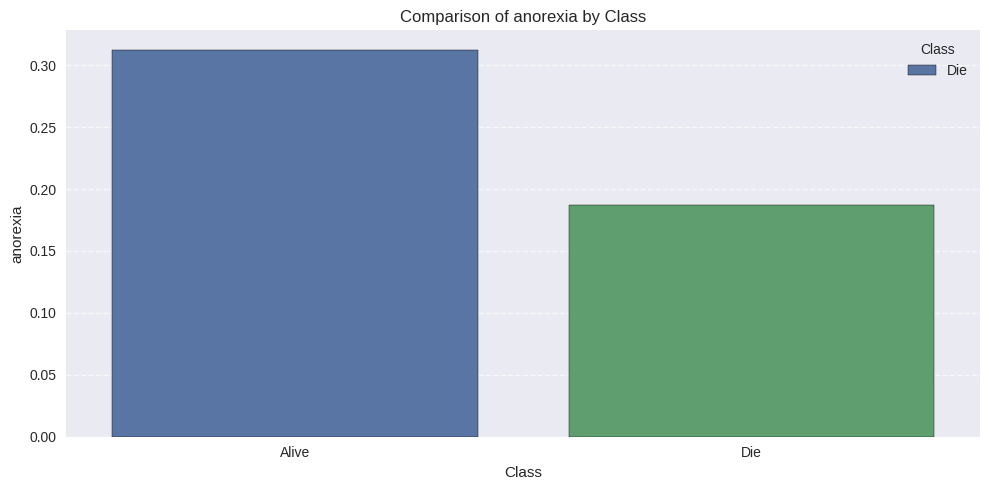

<ipython-input-169-f4679bfa4f97>:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(data=data, y=attribute, x='class', ci=None,edgecolor="black")
<ipython-input-169-f4679bfa4f97>:12: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


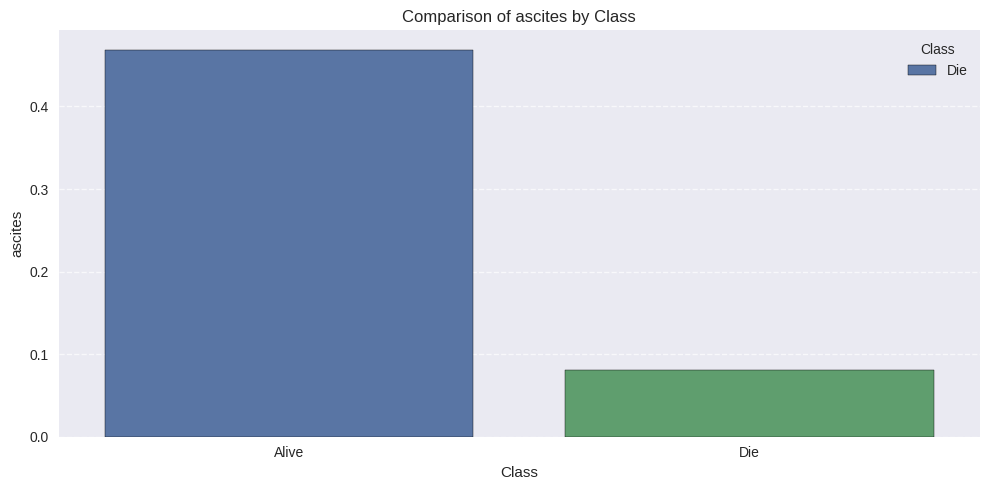

<ipython-input-169-f4679bfa4f97>:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(data=data, y=attribute, x='class', ci=None,edgecolor="black")
<ipython-input-169-f4679bfa4f97>:12: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


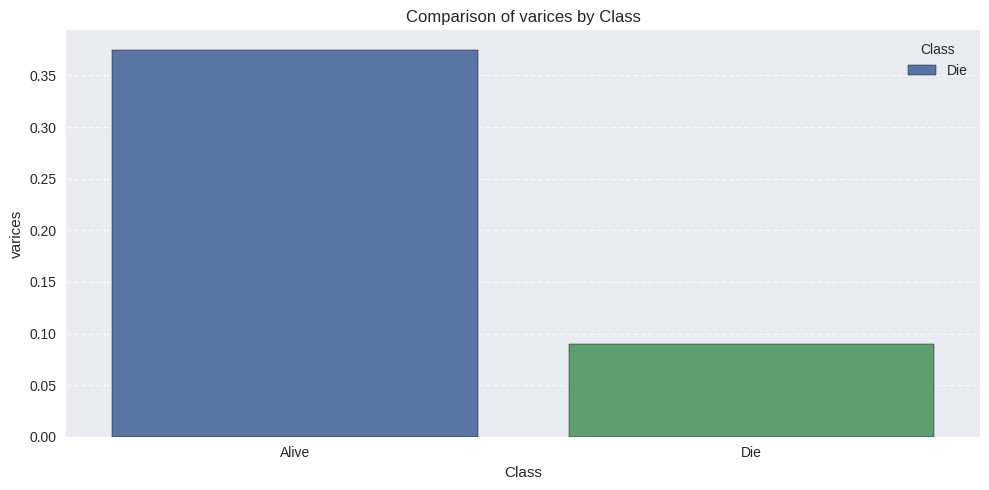

In [ ]:
selected_attributes = ['steroid', 'fatigue', 'anorexia', 'ascites', 'varices']
sns.set_palette('pastel')
for attribute in selected_attributes:
    plt.figure(figsize=(10, 5))
    ax = sns.barplot(data=data, y=attribute, x='class', ci=None,edgecolor="black")
    ax.set_xticks([0, 1])
    ax.set_xticklabels(['Alive', 'Die'])
    plt.ylabel(attribute)
    plt.xlabel('Class')
    plt.title(f'Comparison of {attribute} by Class')
    plt.legend(title='Class', loc='upper right', labels=['Die', 'Alive'])
    plt.style.use('seaborn')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

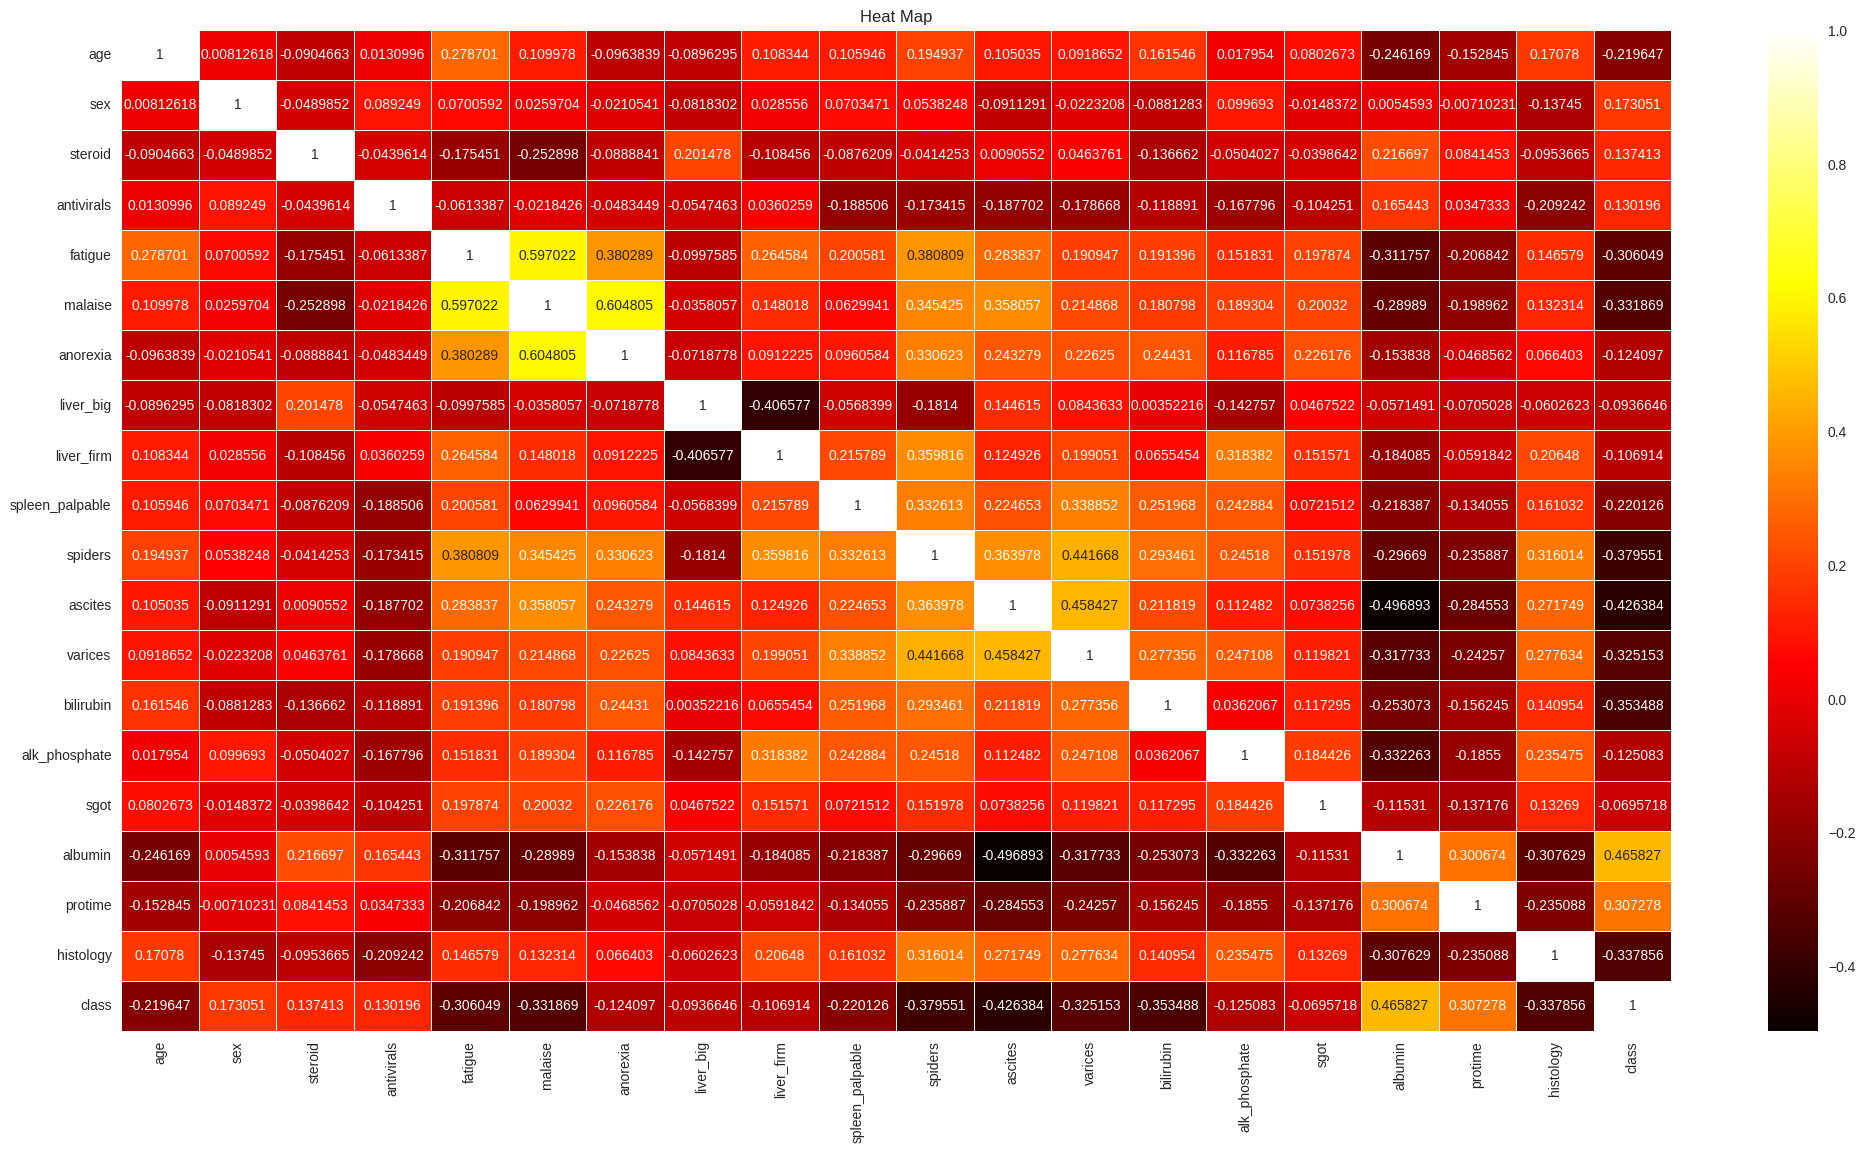

In [ ]:
fig = plt.figure(figsize=(25,13))
corr = data.corr()
plt.title('Heat Map')
ax = sns.heatmap(corr, linewidths=.5, cmap="hot", annot=True, fmt="g")

In [ ]:
x = data.drop("class",axis = 1)
y = data['class']

#Logistic Regression

In [ ]:
# Train and Test Data Splited Into 65:35 Ratio
x_train_1, x_test_1, y_train_1, y_test_1 = train_test_split(x,y,test_size=0.35,random_state=100)

In [ ]:
print(x_train_1.shape)
print(x_test_1.shape)
print(y_train_1.shape)
print(y_test_1.shape)

(100, 19)
(55, 19)
(100,)
(55,)


In [ ]:
logmodel = LogisticRegression()
logmodel.fit(x_train_1,y_train_1)

In [ ]:
predictions_1 = logmodel.predict(x_test_1)

In [ ]:
print(classification_report(y_test_1,predictions_1))

              precision    recall  f1-score   support

           0       0.73      0.62      0.67        13
           1       0.89      0.93      0.91        42

    accuracy                           0.85        55
   macro avg       0.81      0.77      0.79        55
weighted avg       0.85      0.85      0.85        55



In [ ]:
print(confusion_matrix(y_test_1,predictions_1))

[[ 8  5]
 [ 3 39]]


In [ ]:
format(accuracy_score(y_test_1,predictions_1),".2f")

'0.85'

In [ ]:
# Train and Test Data Splited Into 70:30 Ratio
x_train_2, x_test_2, y_train_2, y_test_2 = train_test_split(x,y,test_size=0.30,random_state=98)

In [ ]:
print(x_train_2.shape)
print(x_test_2.shape)
print(y_train_2.shape)
print(y_test_2.shape)

(108, 19)
(47, 19)
(108,)
(47,)


In [ ]:
logmodel = LogisticRegression()
logmodel.fit(x_train_2,y_train_2)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
predictions_2 = logmodel.predict(x_test_2)

In [ ]:
print(classification_report(y_test_2,predictions_2))

              precision    recall  f1-score   support

           0       0.50      0.60      0.55         5
           1       0.95      0.93      0.94        42

    accuracy                           0.89        47
   macro avg       0.73      0.76      0.74        47
weighted avg       0.90      0.89      0.90        47



In [ ]:
print(confusion_matrix(y_test_2,predictions_2))

[[ 3  2]
 [ 3 39]]


In [ ]:
format(accuracy_score(y_test_2,predictions_2),".2f")

'0.89'

In [ ]:
# Train and Test Data Splited Into 75:25 Ratio
x_train_3, x_test_3, y_train_3, y_test_3 = train_test_split(x,y,test_size=0.35,random_state=97)

In [ ]:
print(x_train_3.shape)
print(x_test_3.shape)
print(y_train_3.shape)
print(y_test_3.shape)

(100, 19)
(55, 19)
(100,)
(55,)


In [ ]:
logmodel = LogisticRegression()
logmodel.fit(x_train_3,y_train_3)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
predictions_3= logmodel.predict(x_test_3)

In [ ]:
print(classification_report(y_test_3,predictions_3))

              precision    recall  f1-score   support

           0       0.50      0.57      0.53        14
           1       0.85      0.80      0.83        41

    accuracy                           0.75        55
   macro avg       0.67      0.69      0.68        55
weighted avg       0.76      0.75      0.75        55



In [ ]:
print(confusion_matrix(y_test_3,predictions_3))

[[ 8  6]
 [ 8 33]]


In [ ]:
format(accuracy_score(y_test_3,predictions_3),".2f")

'0.75'

In [ ]:
# Train and Test Data Splited Into 80:20 Ratio
x_train_4, x_test_4, y_train_4, y_test_4 = train_test_split(x,y,test_size=0.35,random_state=195)

In [ ]:
print(x_train_4.shape)
print(x_test_4.shape)
print(y_train_4.shape)
print(y_test_4.shape)

(100, 19)
(55, 19)
(100,)
(55,)


In [ ]:
logmodel = LogisticRegression()
logmodel.fit(x_train_4,y_train_4)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
predictions_4 = logmodel.predict(x_test_4)

In [ ]:
print(classification_report(y_test_4,predictions_4))

              precision    recall  f1-score   support

           0       0.60      0.55      0.57        11
           1       0.89      0.91      0.90        44

    accuracy                           0.84        55
   macro avg       0.74      0.73      0.74        55
weighted avg       0.83      0.84      0.83        55



In [ ]:
print(confusion_matrix(y_test_1,predictions_1))

[[ 8  5]
 [ 3 39]]


In [ ]:
format(accuracy_score(y_test_4,predictions_4),".2f")

'0.84'

#Decision Tree Classifier

In [ ]:
# Train and Test Data Splited Into 65:35 Ratio
clf=DecisionTreeClassifier(criterion="entropy",max_depth=7,min_samples_split=9,random_state=10)   # we can also use "gini" in criterion

In [ ]:
clf.fit(x_train_1,y_train_1)

DecisionTreeClassifier(criterion='entropy', max_depth=7, min_samples_split=9,
                       random_state=10)

In [ ]:
clf.feature_importances_

array([0.04067343, 0.10132994, 0.        , 0.        , 0.13795314,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.0784424 , 0.        , 0.        , 0.07762632, 0.        ,
       0.        , 0.43824293, 0.12573183, 0.        ])

In [ ]:
y_pred_1=clf.predict(x_test_1)

In [ ]:
confusion_matrix(y_test_1,y_pred_1)

array([[ 6,  7],
       [ 3, 39]])

In [ ]:
accuracy_score(y_test_1,y_pred_1)

0.8181818181818182

In [ ]:
cross_val_score(clf,x_train_1,y_train_1,cv=10)

array([0.9, 0.9, 0.8, 0.6, 0.9, 0.8, 0.9, 0.5, 0.7, 0.8])

In [ ]:
print(classification_report(y_pred_1,y_test_1))

              precision    recall  f1-score   support

           0       0.46      0.67      0.55         9
           1       0.93      0.85      0.89        46

    accuracy                           0.82        55
   macro avg       0.70      0.76      0.72        55
weighted avg       0.85      0.82      0.83        55



In [ ]:
# Train and Test Data Splited Into 70:30 Ratio
clf=DecisionTreeClassifier(criterion="entropy",max_depth=7,min_samples_split=9,random_state=56)   # we can also use "gini" in criterion

In [ ]:
clf.fit(x_train_2,y_train_2)

DecisionTreeClassifier(criterion='entropy', max_depth=7, min_samples_split=9,
                       random_state=56)

In [ ]:
clf.feature_importances_

array([0.12706214, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.07115141, 0.        , 0.        , 0.25066677, 0.        ,
       0.        , 0.45285311, 0.        , 0.09826656])

In [ ]:
y_pred_2=clf.predict(x_test_2)

In [ ]:
y_pred_2

array([1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 0, 0])

In [ ]:
confusion_matrix(y_test_2,y_pred_2)

array([[ 2,  3],
       [ 9, 33]])

In [ ]:
accuracy_score(y_test_2,y_pred_2)

0.7446808510638298

In [ ]:
print(classification_report(y_pred_2,y_test_2))

              precision    recall  f1-score   support

           0       0.40      0.18      0.25        11
           1       0.79      0.92      0.85        36

    accuracy                           0.74        47
   macro avg       0.59      0.55      0.55        47
weighted avg       0.70      0.74      0.71        47



In [ ]:
cross_val_score(clf,x_train_2,y_train_2,cv=10)

array([0.81818182, 0.54545455, 0.63636364, 0.81818182, 0.81818182,
       0.54545455, 0.72727273, 0.72727273, 0.9       , 0.9       ])

In [ ]:
# Train and Test Data Splited Into 75:25 Ratio
clf=DecisionTreeClassifier(criterion="entropy",max_depth=7,min_samples_split=9,random_state=157)   # we can also use "gini" in criterion

In [ ]:
clf.fit(x_train_3,y_train_3)

DecisionTreeClassifier(criterion='entropy', max_depth=7, min_samples_split=9,
                       random_state=157)

In [ ]:
clf.feature_importances_

array([0.14726608, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.11625585, 0.        , 0.06761552, 0.17455599, 0.11419387,
       0.        , 0.38011269, 0.        , 0.        ])

In [ ]:
y_pred_3=clf.predict(x_test_3)

In [ ]:
y_pred_3

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0])

In [ ]:
confusion_matrix(y_test_3,y_pred_3)

array([[ 5,  9],
       [ 7, 34]])

In [ ]:
accuracy_score(y_test_3,y_pred_3)

0.7090909090909091

In [ ]:
cross_val_score(clf,x_train_3,y_train_3,cv=10)

array([0.9, 0.8, 0.8, 0.9, 0.8, 0.8, 1. , 0.8, 0.9, 1. ])

In [ ]:
print(classification_report(y_pred_3,y_test_3))

              precision    recall  f1-score   support

           0       0.36      0.42      0.38        12
           1       0.83      0.79      0.81        43

    accuracy                           0.71        55
   macro avg       0.59      0.60      0.60        55
weighted avg       0.73      0.71      0.72        55



In [ ]:
# Train and Test Data Splited Into 80:20 Ratio
clf=DecisionTreeClassifier(criterion="entropy",max_depth=7,min_samples_split=44,random_state=10)   # we can also use "gini" in criterion

In [ ]:
clf.fit(x_train_4,y_train_4)

DecisionTreeClassifier(criterion='entropy', max_depth=7, min_samples_split=44,
                       random_state=10)

In [ ]:
clf.feature_importances_

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.12674818, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.63318093, 0.24007089, 0.        ])

In [ ]:
y_pred_4=clf.predict(x_test_4)

In [ ]:
y_pred_4

array([1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [ ]:
confusion_matrix(y_test_4,y_pred_4)

array([[ 4,  7],
       [ 4, 40]])

In [ ]:
accuracy_score(y_test_4,y_pred_4)

0.8

In [ ]:
cross_val_score(clf,x_train_4,y_train_4,cv=10)

array([0.7, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8])

In [ ]:
print(classification_report(y_pred_4,y_test_4))

              precision    recall  f1-score   support

           0       0.36      0.50      0.42         8
           1       0.91      0.85      0.88        47

    accuracy                           0.80        55
   macro avg       0.64      0.68      0.65        55
weighted avg       0.83      0.80      0.81        55



#Random Forest Classifier

In [ ]:
# Train and Test Data Splited Into 65:35 Ratio
clf=RandomForestClassifier(criterion = "gini",max_depth=8,min_samples_split=10,random_state=5)

In [ ]:
clf.fit(x_train_1,y_train_1)

RandomForestClassifier(max_depth=8, min_samples_split=10, random_state=5)

In [ ]:
clf.feature_importances_

array([0.03198409, 0.01216139, 0.00628443, 0.00318928, 0.02068959,
       0.02317575, 0.00784101, 0.00425363, 0.00414485, 0.02228203,
       0.07788954, 0.12960777, 0.05549608, 0.17333013, 0.03611798,
       0.04118757, 0.20571067, 0.12043843, 0.02421579])

In [ ]:
y_pred_1=clf.predict(x_test_1)

In [ ]:
confusion_matrix(y_test_1,y_pred_1)

array([[ 5,  8],
       [ 2, 40]])

In [ ]:
accuracy_score(y_test_1,y_pred_1)

0.8181818181818182

In [ ]:
cross_val_score(clf,x_train_1,y_train_1,cv=5)

array([0.9 , 0.75, 0.8 , 0.9 , 1.  ])

In [ ]:
print(classification_report(y_pred_1,y_test_1))

              precision    recall  f1-score   support

           0       0.38      0.71      0.50         7
           1       0.95      0.83      0.89        48

    accuracy                           0.82        55
   macro avg       0.67      0.77      0.69        55
weighted avg       0.88      0.82      0.84        55



In [ ]:
# Train and Test Data Splited Into 70:30 Ratio
clf=RandomForestClassifier(criterion = "gini",max_depth=8,min_samples_split=10,random_state=5)

In [ ]:
clf.fit(x_train_2,y_train_2)

RandomForestClassifier(max_depth=8, min_samples_split=10, random_state=5)

In [ ]:
y_pred_2=clf.predict(x_test_2)

In [ ]:
y_pred_2

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 0, 1])

In [ ]:
confusion_matrix(y_test_2,y_pred_2)

array([[ 2,  3],
       [ 3, 39]])

In [ ]:
accuracy_score(y_test_2,y_pred_2)

0.8723404255319149

In [ ]:
cross_val_score(clf,x_train_2,y_train_2,cv=5)

array([0.72727273, 0.86363636, 0.90909091, 0.80952381, 0.85714286])

In [ ]:
print(classification_report(y_pred_2,y_test_2))

              precision    recall  f1-score   support

           0       0.40      0.40      0.40         5
           1       0.93      0.93      0.93        42

    accuracy                           0.87        47
   macro avg       0.66      0.66      0.66        47
weighted avg       0.87      0.87      0.87        47



In [ ]:
# Train and Test Data Splited Into 75:25 Ratio
clf=RandomForestClassifier(criterion = "gini",max_depth=8,min_samples_split=10,random_state=5)

In [ ]:
clf.fit(x_train_3,y_train_3)

RandomForestClassifier(max_depth=8, min_samples_split=10, random_state=5)

In [ ]:
y_pred_3=clf.predict(x_test_3)

In [ ]:
y_pred_3

array([0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1])

In [ ]:
confusion_matrix(y_test_3,y_pred_3)

array([[ 5,  9],
       [ 3, 38]])

In [ ]:
accuracy_score(y_test_3,y_pred_3)

0.7818181818181819

In [ ]:
cross_val_score(clf,x_train_3,y_train_3,cv=5)

array([0.8 , 0.85, 0.95, 1.  , 0.95])

In [ ]:
print(classification_report(y_pred_3,y_test_3))

              precision    recall  f1-score   support

           0       0.36      0.62      0.45         8
           1       0.93      0.81      0.86        47

    accuracy                           0.78        55
   macro avg       0.64      0.72      0.66        55
weighted avg       0.84      0.78      0.80        55



In [ ]:
# Train and Test Data Splited Into 80:20 Ratio
clf=RandomForestClassifier(criterion = "gini",max_depth=8,min_samples_split=10,random_state=5)

In [ ]:
clf.fit(x_train_4,y_train_4)

RandomForestClassifier(max_depth=8, min_samples_split=10, random_state=5)

In [ ]:
y_pred_4=clf.predict(x_test_4)

In [ ]:
y_pred_4

array([1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0])

In [ ]:
confusion_matrix(y_test_4,y_pred_4)

array([[ 5,  6],
       [ 1, 43]])

In [ ]:
accuracy_score(y_test_4,y_pred_4)

0.8727272727272727

In [ ]:
cross_val_score(clf,x_train_4,y_train_4,cv=5)

array([0.9 , 0.75, 0.8 , 0.8 , 0.65])

In [ ]:
print(classification_report(y_pred_4,y_test_4))

              precision    recall  f1-score   support

           0       0.45      0.83      0.59         6
           1       0.98      0.88      0.92        49

    accuracy                           0.87        55
   macro avg       0.72      0.86      0.76        55
weighted avg       0.92      0.87      0.89        55



#KNN Classifier

In [ ]:
# Train and Test Data Splited Into 65:35 Ratio
knn_classifier = KNeighborsClassifier(n_neighbors=11)
knn_classifier.fit(x_train_1,y_train_1)

KNeighborsClassifier(n_neighbors=11)

In [ ]:
y_pred_1=clf.predict(x_test_1)

In [ ]:
confusion_matrix(y_test_1,y_pred_1)

array([[ 9,  4],
       [ 0, 42]])

In [ ]:
accuracy_score(y_test_1,y_pred_1)

0.9272727272727272

In [ ]:
cross_val_score(clf,x_train_1,y_train_1,cv=5)

array([0.9 , 0.75, 0.8 , 0.9 , 1.  ])

In [ ]:
print(classification_report(y_pred_1,y_test_1))

              precision    recall  f1-score   support

           0       0.69      1.00      0.82         9
           1       1.00      0.91      0.95        46

    accuracy                           0.93        55
   macro avg       0.85      0.96      0.89        55
weighted avg       0.95      0.93      0.93        55



In [ ]:
# Train and Test Data Splited Into 70:30 Ratio
knn_classifier = KNeighborsClassifier(n_neighbors=11)
knn_classifier.fit(x_train_2,y_train_2)

KNeighborsClassifier(n_neighbors=11)

In [ ]:
y_pred_2=clf.predict(x_test_2)

In [ ]:
y_pred_2

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 0, 1])

In [ ]:
confusion_matrix(y_test_2,y_pred_2)

array([[ 3,  2],
       [ 1, 41]])

In [ ]:
accuracy_score(y_test_2,y_pred_2)

0.9361702127659575

In [ ]:
print(classification_report(y_pred_2,y_test_2))

              precision    recall  f1-score   support

           0       0.60      0.75      0.67         4
           1       0.98      0.95      0.96        43

    accuracy                           0.94        47
   macro avg       0.79      0.85      0.82        47
weighted avg       0.94      0.94      0.94        47



In [ ]:
# Train and Test Data Splited Into 75:25 Ratio
knn_classifier = KNeighborsClassifier(n_neighbors=11)
knn_classifier.fit(x_train_3,y_train_3)

KNeighborsClassifier(n_neighbors=11)

In [ ]:
y_pred_3=clf.predict(x_test_3)

In [ ]:
y_pred_3

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [ ]:
confusion_matrix(y_test_3,y_pred_3)

array([[ 9,  5],
       [ 0, 41]])

In [ ]:
accuracy_score(y_test_3,y_pred_3)

0.9090909090909091

In [ ]:
print(classification_report(y_pred_3,y_test_3))

              precision    recall  f1-score   support

           0       0.64      1.00      0.78         9
           1       1.00      0.89      0.94        46

    accuracy                           0.91        55
   macro avg       0.82      0.95      0.86        55
weighted avg       0.94      0.91      0.92        55



In [ ]:
# Train and Test Data Splited Into 80:20 Ratio
knn_classifier = KNeighborsClassifier(n_neighbors=11)
knn_classifier.fit(x_train_4,y_train_4)

KNeighborsClassifier(n_neighbors=11)

In [ ]:
y_pred_4=clf.predict(x_test_4)

In [ ]:
y_pred_4

array([1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0])

In [ ]:
confusion_matrix(y_test_4,y_pred_4)

array([[ 5,  6],
       [ 1, 43]])

In [ ]:
accuracy_score(y_test_4,y_pred_4)

0.8727272727272727

In [ ]:
print(classification_report(y_pred_4,y_test_4))

              precision    recall  f1-score   support

           0       0.45      0.83      0.59         6
           1       0.98      0.88      0.92        49

    accuracy                           0.87        55
   macro avg       0.72      0.86      0.76        55
weighted avg       0.92      0.87      0.89        55



#SVM Classifier

In [ ]:
# Train and Test Data Splited Into 65:35 Ratio
model=SVC(kernel="linear")   #we other options for kernals that is {"poly","rbf","sigmoid"}

In [ ]:
model.fit(x_train_1,y_train_1)

SVC(kernel='linear')

In [ ]:
y_pred_1=model.predict(x_test_1)

In [ ]:
confusion_matrix(y_test_1,y_pred_1)

array([[ 7,  6],
       [ 4, 38]])

In [ ]:
model.score(x_test_1,y_test_1)

0.8181818181818182

In [ ]:
print(classification_report(y_pred_1,y_test_1))

              precision    recall  f1-score   support

           0       0.54      0.64      0.58        11
           1       0.90      0.86      0.88        44

    accuracy                           0.82        55
   macro avg       0.72      0.75      0.73        55
weighted avg       0.83      0.82      0.82        55



In [ ]:
# Train and Test Data Splited Into 70:30 Ratio
model=SVC(kernel="linear")

In [ ]:
model.fit(x_train_2,y_train_2)

SVC(kernel='linear')

In [ ]:
y_pred_2=model.predict(x_test_2)

In [ ]:
confusion_matrix(y_test_2,y_pred_2)

array([[ 3,  2],
       [ 4, 38]])

In [ ]:
model.score(x_test_2,y_test_2)

0.8723404255319149

In [ ]:
print(classification_report(y_pred_2,y_test_2))

              precision    recall  f1-score   support

           0       0.60      0.43      0.50         7
           1       0.90      0.95      0.93        40

    accuracy                           0.87        47
   macro avg       0.75      0.69      0.71        47
weighted avg       0.86      0.87      0.86        47



In [ ]:
# Train and Test Data Splited Into 75:25 Ratio
model=SVC(kernel="linear")

In [ ]:
model.fit(x_train_3,y_train_3)

SVC(kernel='linear')

In [ ]:
y_pred_3=model.predict(x_test_3)

In [ ]:
confusion_matrix(y_test_3,y_pred_3)

array([[ 8,  6],
       [ 8, 33]])

In [ ]:
model.score(x_test_3,y_test_3)

0.7454545454545455

In [ ]:
print(classification_report(y_pred_3,y_test_3))

              precision    recall  f1-score   support

           0       0.57      0.50      0.53        16
           1       0.80      0.85      0.83        39

    accuracy                           0.75        55
   macro avg       0.69      0.67      0.68        55
weighted avg       0.74      0.75      0.74        55



In [ ]:
# Train and Test Data Splited Into 80:20 Ratio
model=SVC(kernel="linear")

In [ ]:
model.fit(x_train_4,y_train_4)

SVC(kernel='linear')

In [ ]:
y_pred_4=model.predict(x_test_4)

In [ ]:
confusion_matrix(y_test_4,y_pred_4)

array([[ 8,  3],
       [ 5, 39]])

In [ ]:
model.score(x_test_4,y_test_4)

0.8545454545454545

In [ ]:
print(classification_report(y_pred_4,y_test_4))

              precision    recall  f1-score   support

           0       0.73      0.62      0.67        13
           1       0.89      0.93      0.91        42

    accuracy                           0.85        55
   macro avg       0.81      0.77      0.79        55
weighted avg       0.85      0.85      0.85        55

